In [13]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Input Rate of Broker-1
df1b = pd.read_csv("Brok1IR.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-31 14:48:27,261459731,my-cluster-metrics-kafka-0
1,2021-07-31 14:48:57,281986145,my-cluster-metrics-kafka-0
2,2021-07-31 14:49:27,297413617,my-cluster-metrics-kafka-0


In [14]:
#Average Input Rate before rebalancing
irbr1 = df1b[(df1b['timestamp'] >= '2021-07-31 14:48:27') & (df1b['timestamp'] <= '2021-07-31 15:16:57')]
irbr1.head(3)
irbr1avg = irbr1['values'].mean()
print(irbr1avg)
irbr1.describe()

715562092.7241379


,values
count,5.800000e+01
mean,7.155621e+08
std,2.541166e+08
min,2.614597e+08
25%,5.093521e+08
50%,7.290430e+08
75%,9.175146e+08
max,1.130290e+09


In [15]:
#Average Input Rate During rebalancing
irdr1 = df1b[(df1b['timestamp'] >= '2021-07-31 15:17:27') & (df1b['timestamp'] <= '2021-07-31 15:28:57')]
irdr1.head(3)
irdr1avg = irdr1['values'].mean()
print(irdr1avg)
irdr1.describe()

1314922736.7916667


,values
count,2.400000e+01
mean,1.314923e+09
std,9.635731e+07
min,1.152319e+09
25%,1.235232e+09
50%,1.313328e+09
75%,1.398499e+09
max,1.466363e+09


In [16]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1ir = ttest_ind(irdr1['values'], irbr1['values'])
print(resb1ir)

Ttest_indResult(statistic=11.19254940686295, pvalue=4.822442957275221e-18)


In [17]:
irbr1.drop(['pod'], axis=1, inplace=True)
irbr1.head(10)
irbr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  58 non-null     datetime64[ns]
 1   values     58 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
irdr1.drop(['pod'], axis=1, inplace=True)
irdr1.head(10)
irdr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 58 to 81
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker1 Input Rate')

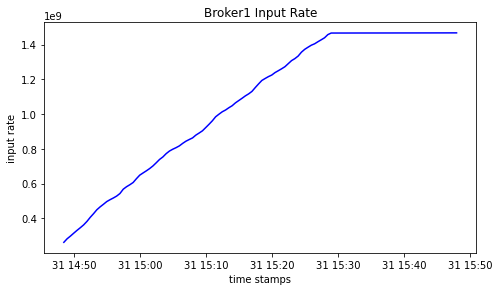

In [19]:
from datetime import datetime
#Input Rate for the entire load test
i1=[]
for dat in df1b.timestamp:
    # print (dat)
    i1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(i1,df1b['values'], 'b')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('input rate')
axe1.set_title('Broker1 Input Rate')
#fig1.tight_layout()

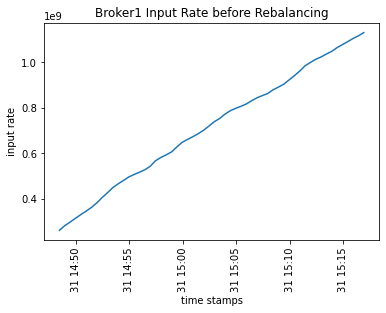

In [20]:
#Input Rate before rebalancing
b1=[]
for dat in irbr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,irbr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate before Rebalancing')
plt.show()

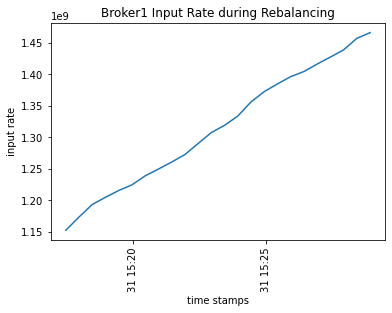

In [21]:
#Input Rate during rebalancing
d1=[]
for dat in irdr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,irdr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate during Rebalancing')
plt.show()

In [27]:
# DA on the Input Rate of Broker-2
df2b = pd.read_csv("Brok2IR.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-31 14:48:09,235363399,my-cluster-metrics-kafka-1
1,2021-07-31 14:48:39,245778220,my-cluster-metrics-kafka-1
2,2021-07-31 14:49:09,262490455,my-cluster-metrics-kafka-1


In [28]:
#Average Input Rate before rebalancing
irbr2 = df2b[(df2b['timestamp'] >= '2021-07-31 14:40:09') & (df2b['timestamp'] <= '2021-07-31 15:17:09')]
irbr2.head(3)
irbr2avg = irbr2['values'].mean()
print(irbr2avg)
irbr2.describe()

708022150.7627119


,values
count,5.900000e+01
mean,7.080222e+08
std,2.734208e+08
min,2.353634e+08
25%,4.823148e+08
50%,7.048005e+08
75%,9.454045e+08
max,1.173088e+09


In [29]:
#Average Input Rate During rebalancing
irdr2 = df2b[(df2b['timestamp'] >= '2021-07-31 15:17:39') & (df2b['timestamp'] <= '2021-07-31 15:28:39')]
irdr2.head(3)
irdr2avg = irdr2['values'].mean()
print(irdr2avg)
irdr2.describe()

1336502289.4782608


,values
count,2.300000e+01
mean,1.336502e+09
std,1.007878e+08
min,1.177750e+09
25%,1.261034e+09
50%,1.331243e+09
75%,1.412937e+09
max,1.498600e+09


In [30]:
#T-Stats Analysis
resb2ir = ttest_ind(irdr2['values'], irbr2['values'])
print(resb2ir)

Ttest_indResult(statistic=10.709299124998768, pvalue=4.076259766429375e-17)


In [31]:
irbr2.drop(['pod'], axis=1, inplace=True)
irbr2.head(10)
irbr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  59 non-null     datetime64[ns]
 1   values     59 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
irdr2.drop(['pod'], axis=1, inplace=True)
irdr2.head(10)
irdr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 59 to 81
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  23 non-null     datetime64[ns]
 1   values     23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 552.0 bytes


Text(0.5, 1.0, 'Broker2 Input Rate')

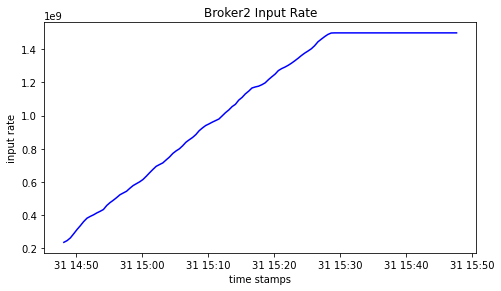

In [33]:
from datetime import datetime
#Input Rate for the entire load test
i2=[]
for dat in df2b.timestamp:
    # print (dat)
    i2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(i2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('input rate')
axe2.set_title('Broker2 Input Rate')
#fig1.tight_layout()

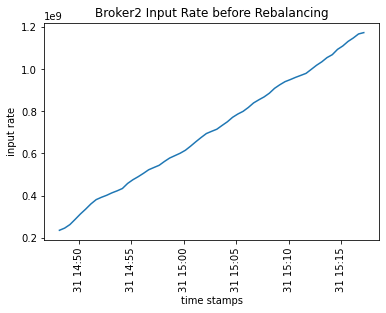

In [34]:
#Input Rate before rebalancing
b2=[]
for dat in irbr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,irbr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate before Rebalancing')
plt.show()

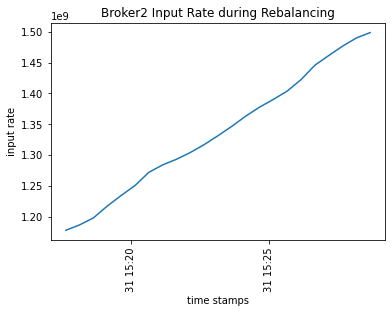

In [35]:
#Input Rate during rebalancing
d2=[]
for dat in irdr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,irdr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate during Rebalancing')
plt.show()

In [45]:
# DA on the Input Rate of Broker-3
df3b = pd.read_csv("Brok3IR.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-31 14:48:32,237758228,my-cluster-metrics-kafka-2
1,2021-07-31 14:49:02,251176578,my-cluster-metrics-kafka-2
2,2021-07-31 14:49:32,262482149,my-cluster-metrics-kafka-2


In [46]:
#Average Input Rate before rebalancing
irbr3 = df3b[(df3b['timestamp'] >= '2021-07-31 14:48:32') & (df3b['timestamp'] <= '2021-07-31 15:17:02')]
irbr3.head(3)
irbr3avg = irbr3['values'].mean()
print(irbr3avg)
irbr3.describe()

652330684.0517242


,values
count,5.800000e+01
mean,6.523307e+08
std,2.474005e+08
min,2.377582e+08
25%,4.288117e+08
50%,6.635728e+08
75%,8.786680e+08
max,1.029181e+09


In [54]:
#Average Input Rate During rebalancing
irdr3 = df3b[(df3b['timestamp'] >= '2021-07-31 15:17:32') & (df3b['timestamp'] <= '2021-07-31 15:28:32')]
irdr3.head(3)
irdr3avg = irdr3['values'].mean()
print(irdr3avg)
irdr3.describe()

1192064701.6086957


,values
count,2.300000e+01
mean,1.192065e+09
std,9.057432e+07
min,1.049220e+09
25%,1.115176e+09
50%,1.188723e+09
75%,1.267227e+09
max,1.349202e+09


In [48]:
#T-Stats Analysis
resb3ir = ttest_ind(irdr3['values'], irbr3['values'])
print(resb3ir)

Ttest_indResult(statistic=10.16338040055555, pvalue=5.331175740203004e-16)


In [49]:
irbr3.drop(['pod'], axis=1, inplace=True)
irbr3.head(10)
irbr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  58 non-null     datetime64[ns]
 1   values     58 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
irdr3.drop(['pod'], axis=1, inplace=True)
irdr3.head(10)
irdr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 58 to 80
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  23 non-null     datetime64[ns]
 1   values     23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 552.0 bytes


Text(0.5, 1.0, 'Broker3 Input Rate')

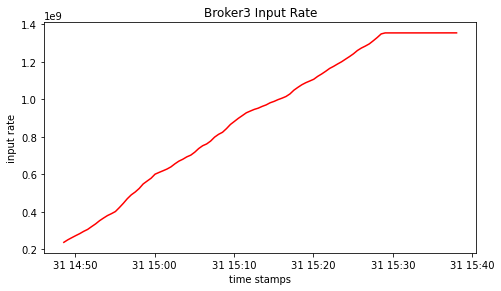

In [51]:
from datetime import datetime
#Input Rate for the entire load test
i3=[]
for dat in df3b.timestamp:
    # print (dat)
    i3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(i3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('input rate')
axe3.set_title('Broker3 Input Rate')
#fig1.tight_layout()

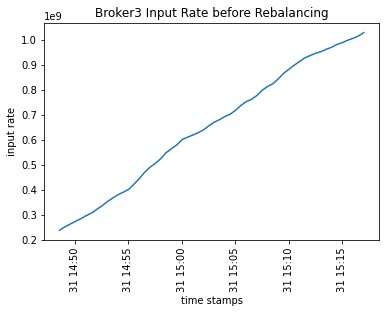

In [52]:
#Input Rate before rebalancing
b3=[]
for dat in irbr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,irbr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate before Rebalancing')
plt.show()

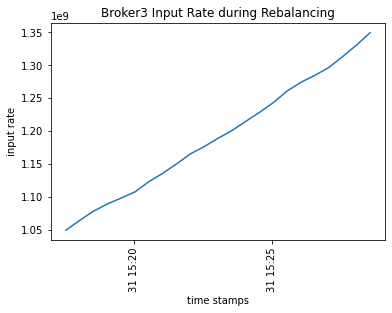

In [53]:
#Input Rate during rebalancing
d3=[]
for dat in irdr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,irdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate during Rebalancing')
plt.show()